In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from modules import utils
from pyvis.network import Network

#### The data

In [9]:
# test_df = pd.read_csv('../test_dfs/21_jan/dqn_test_df_13000000.csv')
test_df = pd.read_csv('../test_dfs/very_simple_datasets/dqn_test_df_11ft_6000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success
0,0.0,9.0,1.0,1.0,1.0,"['ana', 'leukopenia', 'anti_cardioliphin_antib...",0.0,1.0
1,1.0,2.0,1.0,0.0,0.0,"['ana', 'No lupus']",0.0,1.0
2,2.0,9.0,1.0,1.0,1.0,"['ana', 'leukopenia', 'pericardial_effusion', ...",0.0,1.0
3,3.0,10.0,1.0,1.0,1.0,"['ana', 'leukopenia', 'pericardial_effusion', ...",0.0,1.0
4,4.0,8.0,1.0,1.0,1.0,"['ana', 'leukopenia', 'pericardial_effusion', ...",0.0,1.0


In [10]:
pathways_df = utils.create_sankey_df(test_df)
pathways_df['Type'] = 'directed'
pathways_df.head()

,Label1,Label2,value,Type
0,ana,leukopenia,7041,directed
1,leukopenia,anti_cardioliphin_antibodies,3534,directed
2,anti_cardioliphin_antibodies,proteinuria,3534,directed
3,proteinuria,fever,4881,directed
4,fever,pericardial_effusion,433,directed


In [11]:
len(pathways_df)

56

#### Networkx

In [12]:
import networkx as nx

In [13]:
G = nx.from_pandas_edgelist(pathways_df, source='Label1', target='Label2', edge_attr='value')

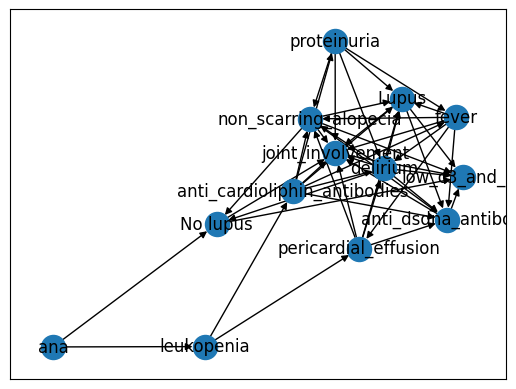

In [14]:
nx.draw_networkx(G, arrows=True)

#### PyVis

In [15]:
# net = Network(notebook=True, cdn_resources='in_line')
net = Network('500px', directed=True, notebook=True, cdn_resources='in_line')
net.from_nx(G)
net.show('example.html')

In [97]:
# nx.draw(G)

In [31]:
# nx.draw_circular(G)

In [32]:
# nx.draw_kamada_kawai(G)

In [33]:
# nx.draw_random(G)

In [34]:
# nx.draw_spring(G)